In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib_venn import venn3
import networkx as nx


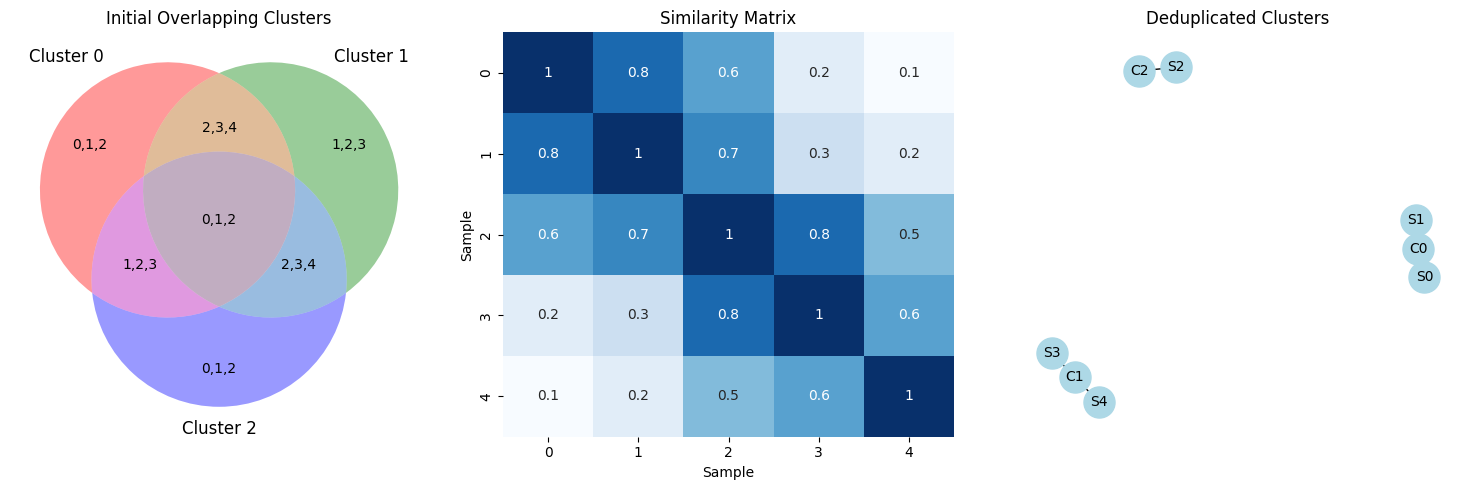

In [4]:

# Similarity matrix
similarity_matrix = np.array([
    [1.0, 0.8, 0.6, 0.2, 0.1],
    [0.8, 1.0, 0.7, 0.3, 0.2],
    [0.6, 0.7, 1.0, 0.8, 0.5],
    [0.2, 0.3, 0.8, 1.0, 0.6],
    [0.1, 0.2, 0.5, 0.6, 1.0]
])

# Initial and final clusters
initial_clusters = [[0, 1, 2], [1, 2, 3], [2, 3, 4]]
final_clusters = [[0, 1], [3, 4], [2]]

# Create figure with subplots
fig = plt.figure(figsize=(15, 5))

# 1. Venn Diagram (Initial Clusters)
plt.subplot(1, 3, 1)
venn = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels=('Cluster 0', 'Cluster 1', 'Cluster 2'))
for idx, subset in enumerate(venn.subset_labels):
    if subset:
        subset.set_text(f"{initial_clusters[idx%3][0]},{initial_clusters[idx%3][1]},{initial_clusters[idx%3][2] if len(initial_clusters[idx%3]) > 2 else ''}")
plt.title("Initial Overlapping Clusters")

# 2. Heatmap (Similarity Matrix)
plt.subplot(1, 3, 2)
sns.heatmap(similarity_matrix, annot=True, cmap="Blues", cbar=False)
plt.title("Similarity Matrix")
plt.xlabel("Sample")
plt.ylabel("Sample")

# 3. Graph (Final Clusters)
plt.subplot(1, 3, 3)
G = nx.Graph()
for i, cluster in enumerate(final_clusters):
    for sample in cluster:
        G.add_edge(f"C{i}", f"S{sample}")
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Deduplicated Clusters")

# Save and close
plt.tight_layout()
plt.savefig("cluster_visualization.png")

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

# Similarity matrix
similarity_matrix = np.array([
    [1.0, 0.8, 0.6, 0.2, 0.1],
    [0.8, 1.0, 0.7, 0.3, 0.2],
    [0.6, 0.7, 1.0, 0.8, 0.5],
    [0.2, 0.3, 0.8, 1.0, 0.6],
    [0.1, 0.2, 0.5, 0.6, 1.0]
])

# Initial clusters
initial_clusters = [[0, 1, 2], [1, 2, 3], [2, 3, 4]]

# Cluster centers for visualization (x, y coordinates)
cluster_centers = [(0, 2), (2, 2), (1, 0)]

# Sample positions within clusters (initially approximate)
sample_positions = [
    [(0.2, 2.2), (0.2, 2.2), (0.2, 2.2)],  # Cluster 0: [0, 1, 2]
    [(2.2, 2.2), (2.2, 2.2), (2.2, 2.2)],  # Cluster 1: [1, 2, 3]
    [(1.2, 0.2), (1.2, 0.2), (1.2, 0.2)]   # Cluster 2: [2, 3, 4]
]

def draw_cluster(ax, center, radius=0.5, color='lightblue', alpha=0.3, label=None):
    circle = Circle(center, radius, color=color, alpha=alpha)
    ax.add_patch(circle)
    if label:
        ax.text(center[0], center[1] + radius + 0.1, label, ha='center', fontsize=10)

def draw_sample(ax, pos, label, color='red', size=0.1):
    circle = Circle(pos, size, color=color)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], str(label), ha='center', va='center', fontsize=8, color='white')

def create_step_image(step, title, sample_to_cluster, sample_similarities, current_cluster=None, current_sample=None, deduplicated=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')
    ax.axis('off')

    # Draw clusters
    for i, center in enumerate(cluster_centers):
        color = 'yellow' if current_cluster == i else 'lightblue'
        draw_cluster(ax, center, label=f"C{i}", color=color)

    # Draw samples
    for sample in range(5):
        # Determine position based on current assignment or initial placement
        if sample_to_cluster[sample] != -1:
            cluster_idx = sample_to_cluster[sample]
            pos = (cluster_centers[cluster_idx][0] + np.random.uniform(-0.2, 0.2),
                   cluster_centers[cluster_idx][1] + np.random.uniform(-0.2, 0.2))
        else:
            # Initial position (average of clusters containing the sample)
            pos = [0, 0]
            count = 0
            for i, cluster in enumerate(initial_clusters):
                if sample in cluster:
                    pos[0] += cluster_centers[i][0]
                    pos[1] += cluster_centers[i][1]
                    count += 1
            pos = (pos[0]/count + np.random.uniform(-0.1, 0.1), pos[1]/count + np.random.uniform(-0.1, 0.1))
        
        color = 'green' if current_sample == sample else 'red'
        draw_sample(ax, pos, sample, color=color)

    # Step title
    ax.text(1.5, 4.2, title, fontsize=12, ha='center', weight='bold')

    # Save image
    plt.savefig(f"step_{step}.png", bbox_inches='tight')
    plt.close()

# Simulate remove_duplicates function with visualization
n_samples = similarity_matrix.shape[0]
sample_to_cluster = [-1] * n_samples
sample_similarities = [0.0] * n_samples

# Step 0: Initial state
create_step_image(0, "Initial State", sample_to_cluster, sample_similarities)

# Step 1-3: Process each cluster
step = 1
for cluster_idx, cluster in enumerate(initial_clusters):
    create_step_image(step, f"Processing Cluster {cluster_idx}", 
                     sample_to_cluster, sample_similarities, current_cluster=cluster_idx)
    step += 1
    
    for sample in cluster:
        cluster_sim = np.mean([similarity_matrix[sample, other] for other in cluster])
        create_step_image(step, f"Evaluating Sample {sample} in C{cluster_idx}", 
                         sample_to_cluster, sample_similarities, cluster_idx, sample)
        step += 1
        
        if sample_to_cluster[sample] == -1 or cluster_sim > sample_similarities[sample]:
            sample_to_cluster[sample] = cluster_idx
            sample_similarities[sample] = cluster_sim
            create_step_image(step, f"Assigned Sample {sample} to C{cluster_idx}", 
                             sample_to_cluster, sample_similarities, cluster_idx, sample)
            step += 1

# Step 4: Create deduplicated clusters
deduplicated = [[] for _ in range(len(initial_clusters))]
for sample, cluster_idx in enumerate(sample_to_cluster):
    if cluster_idx != -1:
        deduplicated[cluster_idx].append(sample)
create_step_image(step, "Deduplicated Clusters", 
                 sample_to_cluster, sample_similarities)

# Step 5: Remove empty clusters
deduplicated = [cluster for cluster in deduplicated if cluster]
step += 1
create_step_image(step, "Removed Empty Clusters", 
                 sample_to_cluster, sample_similarities)

# Step 6: Sort by size
deduplicated.sort(key=len, reverse=True)
step += 1
create_step_image(step, "Sorted Clusters by Size", 
                 sample_to_cluster, sample_similarities)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import imageio
from matplotlib.colors import LinearSegmentedColormap

# Similarity matrix (used for all cases)
similarity_matrix = np.array([
    [1.0, 0.8, 0.6, 0.2, 0.1],
    [0.8, 1.0, 0.7, 0.3, 0.2],
    [0.6, 0.7, 1.0, 0.8, 0.5],
    [0.2, 0.3, 0.8, 1.0, 0.6],
    [0.1, 0.2, 0.5, 0.6, 1.0]
])

# Multiple cases
cases = [
    {"name": "Case 1: Overlapping Clusters", "clusters": [[0, 1, 2], [1, 2, 3], [2, 3, 4]]},
    {"name": "Case 2: Heavy Overlap", "clusters": [[0, 1, 2, 3], [1, 2, 3], [2, 3, 4]]},
    {"name": "Case 3: Disjoint Clusters", "clusters": [[0, 1], [2, 3], [4]]}
]

# Cluster centers
cluster_centers = [(0, 2), (2, 2), (1, 0)]

# Custom gradient colormap for clusters
colors = ['#1e90ff', '#ff69b4', '#32cd32']
cmaps = [LinearSegmentedColormap.from_list(f"grad{i}", [color, '#ffffff']) for i, color in enumerate(colors)]

def draw_cluster(ax, center, radius=0.5, cmap=None, alpha=0.4, label=None):
    for r in np.linspace(0, radius, 50):
        circle = Circle(center, r, color=cmap(r/radius), alpha=alpha)
        ax.add_patch(circle)
    if label:
        ax.text(center[0], center[1] + radius + 0.1, label, ha='center', fontsize=10, color='white', weight='bold')

def draw_sample(ax, pos, label, size=0.1, glow=False):
    if glow:
        for r in np.linspace(size, size*1.5, 10):
            circle = Circle(pos, r, color='yellow', alpha=0.1)
            ax.add_patch(circle)
    circle = Circle(pos, size, color='red')
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], str(label), ha='center', va='center', fontsize=8, color='white')

def interpolate_pos(start, end, t):
    return (start[0] + t*(end[0] - start[0]), start[1] + t*(end[1] - start[1]))

def create_frame(case_idx, step, sample_to_cluster, sample_similarities, current_cluster=None, current_sample=None, transition_t=0):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor('#1a1a1a')

    # Draw clusters
    for i, center in enumerate(cluster_centers):
        cmap = cmaps[i]
        alpha = 0.6 if current_cluster == i else 0.4
        draw_cluster(ax, center, cmap=cmap, alpha=alpha, label=f"C{i}")

    # Draw samples
    for sample in range(5):
        # Default position for unassigned samples
        pos = [0, 0]
        count = 0
        for i, cluster in enumerate(cases[case_idx]["clusters"]):
            if sample in cluster:
                pos[0] += cluster_centers[i][0]
                pos[1] += cluster_centers[i][1]
                count += 1
        if count > 0:
            pos = (pos[0]/count + np.random.uniform(-0.1, 0.1), pos[1]/count + np.random.uniform(-0.1, 0.1))
        else:
            pos = (1.5 + np.random.uniform(-0.1, 0.1), 1.5 + np.random.uniform(-0.1, 0.1))  # Fallback center

        # Position for assigned samples
        target_pos = pos
        if sample_to_cluster[sample] != -1:
            cluster_idx = sample_to_cluster[sample]
            target_pos = (cluster_centers[cluster_idx][0] + np.random.uniform(-0.2, 0.2),
                         cluster_centers[cluster_idx][1] + np.random.uniform(-0.2, 0.2))

        # Smooth movement during reassignment
        if current_sample == sample and transition_t > 0:
            pos = interpolate_pos(pos, target_pos, transition_t)

        draw_sample(ax, pos, sample, glow=(current_sample == sample))

    # Case and step label
    ax.text(1.5, 4.2, cases[case_idx]["name"], fontsize=12, ha='center', color='white', weight='bold')
    ax.text(1.5, 4.0, f"Step: {step}", fontsize=10, ha='center', color='white')

    # Save frame
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close()
    return image

# Generate animation frames
frames = []
for case_idx, case in enumerate(cases):
    n_samples = similarity_matrix.shape[0]
    sample_to_cluster = [-1] * n_samples
    sample_similarities = [0.0] * n_samples

    # Initial state
    frames.append(create_frame(case_idx, "Initial", sample_to_cluster, sample_similarities))

    # Process clusters
    for cluster_idx, cluster in enumerate(case["clusters"]):
        frames.append(create_frame(case_idx, f"Processing C{cluster_idx}", 
                                 sample_to_cluster, sample_similarities, current_cluster=cluster_idx))
        
        for sample in cluster:
            cluster_sim = np.mean([similarity_matrix[sample, other] for other in cluster])
            frames.append(create_frame(case_idx, f"Evaluating S{sample} in C{cluster_idx}", 
                                     sample_to_cluster, sample_similarities, cluster_idx, sample))
            
            if sample_to_cluster[sample] == -1 or cluster_sim > sample_similarities[sample]:
                sample_to_cluster[sample] = cluster_idx
                sample_similarities[sample] = cluster_sim
                # Smooth transition frames
                for t in np.linspace(0, 1, 5):
                    frames.append(create_frame(case_idx, f"Moving S{sample} to C{cluster_idx}", 
                                             sample_to_cluster, sample_similarities, cluster_idx, sample, t))

    # Deduplicated clusters
    deduplicated = [[] for _ in range(len(case["clusters"]))]
    for sample, cluster_idx in enumerate(sample_to_cluster):
        if cluster_idx != -1:
            deduplicated[cluster_idx].append(sample)
    frames.append(create_frame(case_idx, "Deduplicated", sample_to_cluster, sample_similarities))

    # Remove empty clusters
    deduplicated = [cluster for cluster in deduplicated if cluster]
    frames.append(create_frame(case_idx, "No Empty Clusters", sample_to_cluster, sample_similarities))

    # Sort by size
    deduplicated.sort(key=len, reverse=True)
    frames.append(create_frame(case_idx, "Sorted by Size", sample_to_cluster, sample_similarities))

# Save GIF
imageio.mimsave('cluster_animation.gif', frames, fps=5)

/var/folders/px/5k5grmpn7m1683gh7vt2xhsw0000gn/T/ipykernel_84893/4152955426.py:97: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, RegularPolygon, FancyArrowPatch

# Similarity matrix
similarity_matrix = np.array([
    [1.0, 0.8, 0.6, 0.2, 0.1],
    [0.8, 1.0, 0.7, 0.3, 0.2],
    [0.6, 0.7, 1.0, 0.8, 0.5],
    [0.2, 0.3, 0.8, 1.0, 0.6],
    [0.1, 0.2, 0.5, 0.6, 1.0]
])

# Multiple cases
cases = [
    {"name": "Overlapping Clusters", "clusters": [[0, 1, 2], [1, 2, 3], [2, 3, 4]]},
    {"name": "Heavy Overlap", "clusters": [[0, 1, 2, 3], [1, 2, 3], [2, 3, 4]]},
    {"name": "Disjoint Clusters", "clusters": [[0, 1], [2, 3], [4]]}
]

# Cluster centers
cluster_centers = [(0, 2), (2, 2), (1, 0)]

# Sample colors
sample_colors = ['#ff4d4d', '#4dff4d', '#4d4dff', '#ffff4d', '#ff4dff']

# Gradient colormaps for clusters
colors = ['#00b7eb', '#ff00ff', '#00ff00']
cmaps = [LinearSegmentedColormap.from_list(f"grad{i}", [color, '#333333']) for i, color in enumerate(colors)]

def draw_cluster(ax, center, radius=0.5, cmap=None, alpha=0.4, label=None, active=False):
    # Cluster fill
    for r in np.linspace(0, radius, 50):
        circle = Circle(center, r, color=cmap(r/radius), alpha=alpha)
        ax.add_patch(circle)
    # Border
    circle = Circle(center, radius, color=cmap(1.0), alpha=0.6, fill=False, linewidth=1)
    ax.add_patch(circle)
    # Dotted circle for active cluster
    if active:
        circle = Circle(center, radius+0.05, color='white', alpha=0.8, fill=False, linewidth=2, linestyle=':')
        ax.add_patch(circle)
    if label:
        ax.text(center[0], center[1] + radius + 0.15, label, ha='center', fontsize=12, color='black', weight='bold', fontfamily='sans-serif')

def draw_sample(ax, pos, label, color, size=0.1, glow=False, arrow_pos=None, prev_pos=None):
    # Particle effect for glow
    if glow:
        for _ in range(5):
            offset = np.random.uniform(-0.15, 0.15, 2)
            circle = Circle((pos[0] + offset[0], pos[1] + offset[1]), size/4, color='yellow', alpha=0.2)
            ax.add_patch(circle)
        circle = Circle(pos, size*1.2, color='yellow', alpha=0.3)
        ax.add_patch(circle)
    circle = Circle(pos, size, color=color)
    ax.add_patch(circle)
    ax.text(pos[0], pos[1], str(label), ha='center', va='center', fontsize=8, color='black', weight='bold')
    # Arrow for active sample
    if arrow_pos:
        arrow = FancyArrowPatch((arrow_pos[0], arrow_pos[1]), (pos[0], pos[1]), 
                                arrowstyle='->', color='white', mutation_scale=15, linewidth=1)
        ax.add_patch(arrow)
    # Dotted line for movement
    if prev_pos:
        ax.plot([prev_pos[0], pos[0]], [prev_pos[1], pos[1]], color='white', linestyle=':', linewidth=1)

def draw_hex_grid(ax):
    hex_size = 0.2
    for x in np.arange(-1, 4, hex_size * np.sqrt(3)):
        for y in np.arange(-1, 4, hex_size * 1.5):
            hex = RegularPolygon((x, y), numVertices=6, radius=hex_size, color='white', alpha=0.05, fill=False)
            ax.add_patch(hex)

def create_image(case_idx, step_label, sample_to_cluster, sample_similarities, current_cluster=None, current_sample=None, prev_positions=None, filename=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 4)
    ax.set_aspect('equal')
    ax.axis('off')
    # Gradient background
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    ax.imshow(gradient, cmap='Greys', extent=[-1, 4, -1, 4], alpha=0.3, aspect='auto')
    ax.set_facecolor('#0d1b2a')

    # Hexagonal grid
    draw_hex_grid(ax)

    # Draw clusters
    for i, center in enumerate(cluster_centers):
        cmap = cmaps[i]
        alpha = 0.5 if current_cluster == i else 0.3
        radius = 0.5
        draw_cluster(ax, center, radius=radius, cmap=cmap, alpha=alpha, label=f"C{i}", active=(current_cluster == i))

    # Draw samples
    for sample in range(5):
        # Initial position for unassigned samples
        pos = [0, 0]
        count = 0
        for i, cluster in enumerate(cases[case_idx]["clusters"]):
            if sample in cluster:
                pos[0] += cluster_centers[i][0]
                pos[1] += cluster_centers[i][1]
                count += 1
        if count > 0:
            pos = (pos[0]/count + np.random.uniform(-0.1, 0.1), pos[1]/count + np.random.uniform(-0.1, 0.1))
        else:
            pos = (1.5 + np.random.uniform(-0.1, 0.1), 1.5 + np.random.uniform(-0.1, 0.1))

        # Position for assigned samples
        prev_pos = None
        if sample_to_cluster[sample] != -1:
            cluster_idx = sample_to_cluster[sample]
            pos = (cluster_centers[cluster_idx][0] + np.random.uniform(-0.2, 0.2),
                   cluster_centers[cluster_idx][1] + np.random.uniform(-0.2, 0.2))
            if prev_positions and prev_positions[sample] and prev_positions[sample] != pos:
                prev_pos = prev_positions[sample]

        # Arrow position for active sample
        arrow_pos = None
        if current_sample == sample:
            arrow_pos = (pos[0] + 0.3, pos[1] + 0.3)

        draw_sample(ax, pos, sample, color=sample_colors[sample], glow=(current_sample == sample), arrow_pos=arrow_pos, prev_pos=prev_pos)

    # Case and step label
    ax.text(1.5, 4.2, cases[case_idx]["name"], fontsize=12, ha='center', color='black', weight='bold', fontfamily='sans-serif')
    ax.text(1.5, 4.0, f"Step: {step_label}", fontsize=10, ha='center', color='black', fontfamily='sans-serif')

    # Save image
    plt.savefig(filename, bbox_inches='tight', dpi=150)
    plt.close()

# Generate images for each case
for case_idx, case in enumerate(cases):
    n_samples = 5
    sample_to_cluster = [-1] * n_samples
    sample_similarities = [0.0] * n_samples
    prev_positions = [None] * n_samples
    step = 0

    # Initial state
    create_image(case_idx, "Initial", sample_to_cluster, sample_similarities, 
                 filename=f"case{case_idx}_step{step}.png")
    # Update previous positions
    for sample in range(n_samples):
        pos = [0, 0]
        count = 0
        for i, cluster in enumerate(case["clusters"]):
            if sample in cluster:
                pos[0] += cluster_centers[i][0]
                pos[1] += cluster_centers[i][1]
                count += 1
        if count > 0:
            prev_positions[sample] = (pos[0]/count + np.random.uniform(-0.1, 0.1), pos[1]/count + np.random.uniform(-0.1, 0.1))
        else:
            prev_positions[sample] = (1.5 + np.random.uniform(-0.1, 0.1), 1.5 + np.random.uniform(-0.1, 0.1))
    step += 1

    # Process clusters
    for cluster_idx, cluster in enumerate(case["clusters"]):
        create_image(case_idx, f"Processing C{cluster_idx}", sample_to_cluster, sample_similarities, 
                     current_cluster=cluster_idx, filename=f"case{case_idx}_step{step}.png")
        step += 1
        
        for sample in cluster:
            cluster_sim = np.mean([similarity_matrix[sample, other] for other in cluster])
            # Combine evaluation and assignment
            label = f"S{sample} in C{cluster_idx}"
            old_pos = prev_positions[sample]
            if sample_to_cluster[sample] == -1 or cluster_sim > sample_similarities[sample]:
                sample_to_cluster[sample] = cluster_idx
                sample_similarities[sample] = cluster_sim
                label = f"S{sample} → C{cluster_idx}"
                # Update position
                prev_positions[sample] = (cluster_centers[cluster_idx][0] + np.random.uniform(-0.2, 0.2),
                                         cluster_centers[cluster_idx][1] + np.random.uniform(-0.2, 0.2))
            create_image(case_idx, label, sample_to_cluster, sample_similarities, 
                         cluster_idx, sample, prev_positions, filename=f"case{case_idx}_step{step}.png")
            step += 1

    # Deduplicated clusters
    deduplicated = [[] for _ in range(len(case["clusters"]))]
    for sample, cluster_idx in enumerate(sample_to_cluster):
        if cluster_idx != -1:
            deduplicated[cluster_idx].append(sample)
    create_image(case_idx, "Deduplicated", sample_to_cluster, sample_similarities, 
                 filename=f"case{case_idx}_step{step}.png")
    step += 1

    # Remove empty clusters
    deduplicated = [cluster for cluster in deduplicated if cluster]
    create_image(case_idx, "No Empty Clusters", sample_to_cluster, sample_similarities, 
                 filename=f"case{case_idx}_step{step}.png")
    step += 1

    # Sort by size
    deduplicated.sort(key=len, reverse=True)
    create_image(case_idx, "Sorted by Size", sample_to_cluster, sample_similarities, 
                 filename=f"case{case_idx}_step{step}.png")
    step += 1